#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Estimators

In [27]:
def est_average(X):
    """ X contains samples in columns. """
    return np.mean(X, axis = 1)
def est_median(X):
    """ X contains samples in columns. """
    return np.median(X, axis = 1)

def est_linfty(X):
    """ X contains samples in columns. """
    maxima = np.max(X, axis = 1)
    minima = np.min(X, axis = 1)
    return 0.5 * (maxima + minima)

#### Methods to get samples  

In [4]:
# Functions
def uniform_sample_points(D, n_points, bound):
    samples = np.random.uniform(low = -bound, high = bound, size = (D, n_points))
    return samples

def gaussian_sample_points(D, n_points, variance):
    samples = np.random.normal(scale = variance * np.eye(D), size=(D, n_points))
    return samples

#### Experiments

In [34]:
repititions = 50
ambient_dim = 100
bound = 1.0
samplesizes = np.arange(10,200,5)
errors = np.zeros((3, len(samplesizes), repititions))
for k in range(len(samplesizes)):
    for i in range(repititions):
        X = uniform_sample_points(ambient_dim, samplesizes[k], bound)
        errors[0,k,i] = np.linalg.norm(est_average(X)) # Real center is origin
        errors[1,k,i] = np.linalg.norm(est_median(X)) # Real center is origin
        errors[2,k,i] = np.linalg.norm(est_linfty(X)) # Real center is origin
errors_mean = np.mean(errors, axis = 2)
errors_std = np.std(errors, axis = 2)

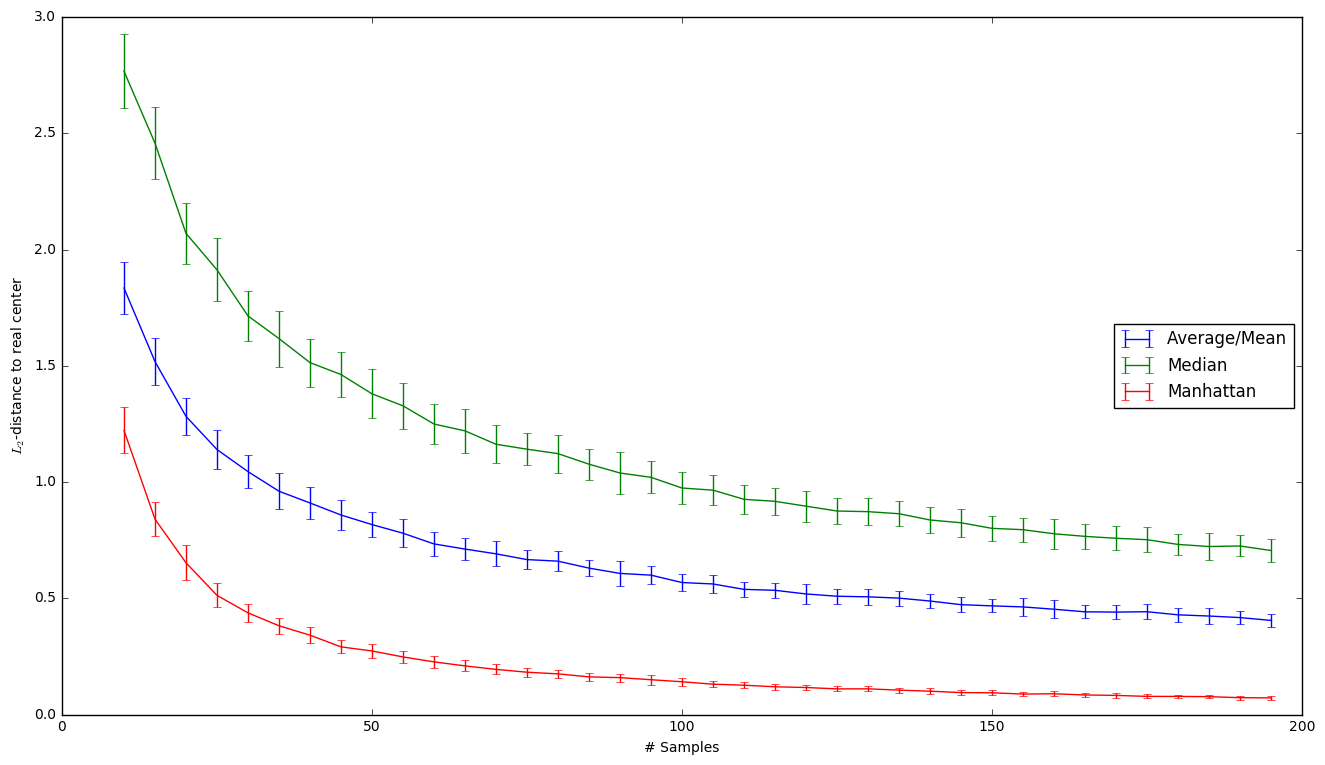

In [35]:
plt.figure(figsize = (16,9))
plt.errorbar(samplesizes, errors_mean[0,:], errors_std[0,:], label = 'Average/Mean')
plt.errorbar(samplesizes, errors_mean[1,:], errors_std[1,:], label = 'Median')
plt.errorbar(samplesizes, errors_mean[2,:], errors_std[2,:], label = 'Manhattan')
plt.xlabel('# Samples')
plt.ylabel(r'$L_2$-distance to real center')
plt.legend(loc = 'center right')
plt.show()

#### Detailed Manhattan Experiments

In [43]:
repititions = 50
ambient_dim = [25, 50, 100, 200]
bound = 1.0
samplesizes = np.arange(10,200,1)
errors = np.zeros((len(samplesizes), len(ambient_dim), repititions))
for k in range(len(samplesizes)):
    for l in range(len(ambient_dim)):
        for i in range(repititions):
            X = uniform_sample_points(ambient_dim[l], samplesizes[k], bound)
            errors[k,l,i] = np.linalg.norm(est_linfty(X)) # Real center is origin
errors_mean = np.mean(errors, axis = 2)
errors_std = np.std(errors, axis = 2)

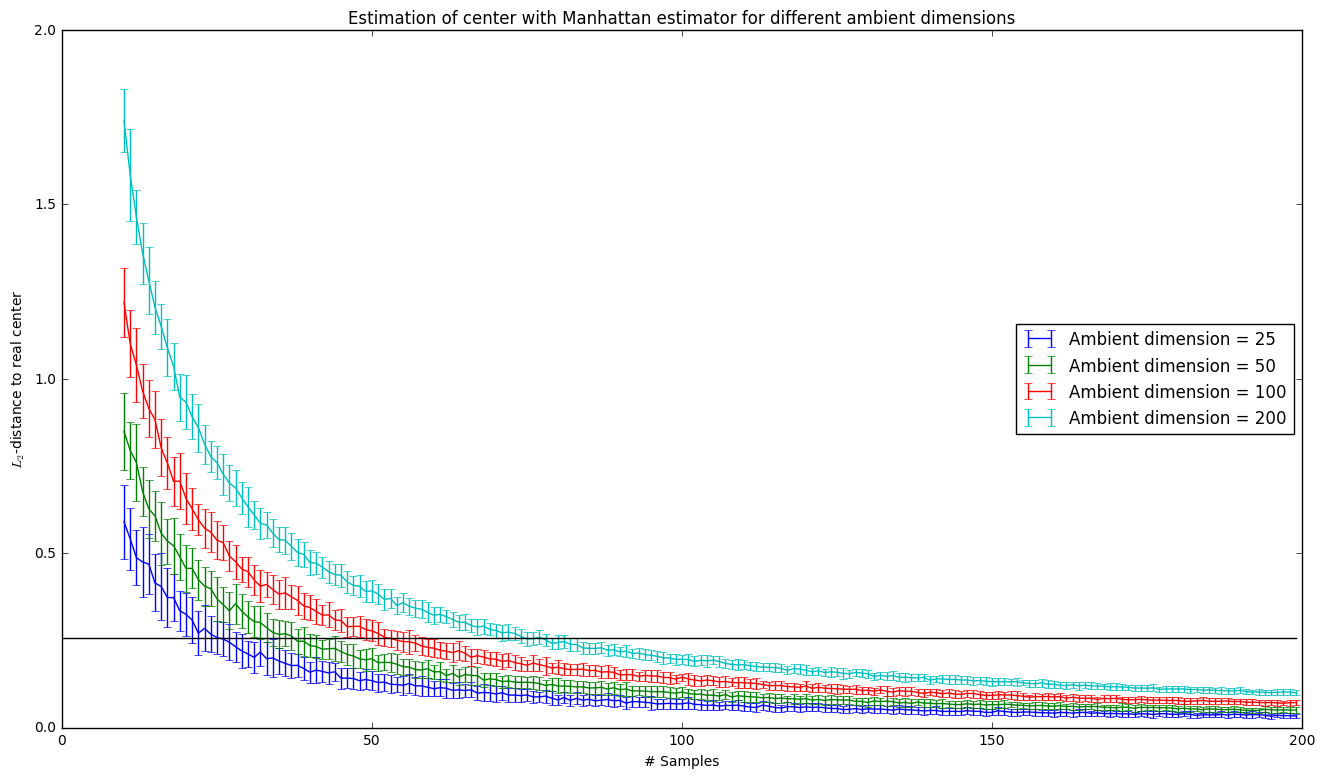

In [54]:
plt.figure(figsize = (16,9))
for j in range(len(ambient_dim)):
    plt.errorbar(samplesizes, errors_mean[:,j], errors_std[:,j], 
                 label = 'Ambient dimension = {0}'.format(str(ambient_dim[j])))
plt.plot(np.array([0,np.max(samplesizes)]), np.array([errors_mean[15,0], errors_mean[15,0]]), 'k')
plt.ylim([0, 2.0])
plt.title('Estimation of center with Manhattan estimator for different ambient dimensions')
plt.xlabel('# Samples')
plt.ylabel(r'$L_2$-distance to real center')
plt.legend(loc = 'center right')
plt.show()